In [17]:
import pandas as pd
import plotly.express as px
import numpy as np
from merge_data import *
import seaborn as sns
import scipy

In [18]:
nox = pd.read_csv("Nox_&_Pm.csv")
o3 = pd.read_csv("merged_datas.csv")

In [19]:
nox["Data"] = nox["Data osservazione"].astype("datetime64[ns]")
nox = nox.drop(columns="Data osservazione")
o3["Data"] = o3["Data"].astype("datetime64[ns]")

In [20]:
df = pd.merge(o3,nox,on=["Data","Location"])

In [21]:
anagrafica = pd.read_csv("E:/DOWNLOADS/aq_labservice_anagrafica_stazioni.csv").drop(columns=["seriale","indirizzo","nr","installazione_tstamp"])

In [22]:
anagrafica["denominazione"] = anagrafica["denominazione"].apply(lambda x: (x.replace(" ","")).upper())
anagrafica = anagrafica.rename(columns={"denominazione":"Location"})

In [23]:
for name in df.Location.unique():
    for name1 in anagrafica.Location.unique():
        if name in name1:
            anagrafica["Location"] = anagrafica["Location"].replace([name1],name)

In [24]:
df1 = pd.merge(df,anagrafica,on="Location").sort_values(by="Data").reset_index(drop=True)

In [25]:
df1[["latitudine","longitudine"]] = df1[["latitudine","longitudine"]].astype(float)

In [26]:
#px.scatter_geo(data_frame=df1,lat="latitudine",lon="longitudine",color="Location",size="O3",animation_frame=df1["Data"].astype(str))

In [27]:
df1

,Data,Day_of_Week,Location,Month_Name,O3,Pr,RH,T,VOC,NO2,PM10-h,PM2.5-h,latitudine,longitudine
0,2022-05-31 22:00:00,Tuesday,ARGINONE,May,26.1,1013.9,75.0,22.5,82.4213,0.0,12.7,12.7,44.842270,11.583010
1,2022-05-31 22:00:00,Tuesday,COCOMARO,May,33.6,1014.4,76.7,21.7,704.2225,0.0,13.6,13.6,44.812002,11.683750
2,2022-05-31 22:00:00,Tuesday,PORTACATENA,May,54.5,1013.7,76.9,22.5,69.6739,0.0,12.2,12.2,44.848840,11.612900
3,2022-05-31 22:00:00,Tuesday,MODENA,May,53.6,1014.7,73.1,23.0,1019.8532,2.5,10.6,10.6,44.846107,11.598717
4,2022-05-31 22:00:00,Tuesday,MOSTI,May,57.5,1013.9,73.9,22.4,557.4582,12.0,13.9,13.9,44.826850,11.609195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33057,2022-09-23 21:00:00,Friday,COCOMARO,September,45.1,1018.3,55.1,17.5,349.8238,1.2,3.6,3.6,44.812002,11.683750
33058,2022-09-23 21:00:00,Friday,ARGINONE,September,33.9,1017.7,50.5,18.3,164.0741,0.0,4.0,4.0,44.842270,11.583010
33059,2022-09-23 21:00:00,Friday,BOLOGNA,September,38.3,1017.2,53.4,16.8,165.7897,0.2,4.6,4.6,44.808802,11.589487
33060,2022-09-23 21:00:00,Friday,MODENA,September,43.4,1018.7,45.3,19.6,401.9515,12.9,3.1,3.1,44.846107,11.598717


In [28]:
px.line(data_frame=df1,x="Data",y="O3",color="Location")

In [29]:
corr = df1.corr()
corr = corr.drop(columns=["latitudine","longitudine"],index=["latitudine","longitudine"])
#col_to_drop = list(corr.columns)
#col_to_drop.remove("Pr")
#col_to_drop.remove("T")
#col_to_drop.remove("RH")
#corr = corr.drop(columns=col_to_drop,index=["Pr","T","RH"])
corr

,O3,Pr,RH,T,VOC,NO2,PM10-h,PM2.5-h
O3,1.000000,-0.078750,-0.766270,0.793162,-0.111702,0.537664,-0.261496,-0.261288
Pr,-0.078750,1.000000,-0.056777,-0.084276,0.009248,-0.071986,0.024897,0.032138
RH,-0.766270,-0.056777,1.000000,-0.835377,0.184208,-0.439640,0.328380,0.328436
T,0.793162,-0.084276,-0.835377,1.000000,-0.108460,0.385824,-0.109663,-0.109247
VOC,-0.111702,0.009248,0.184208,-0.108460,1.000000,-0.021857,0.146402,0.146544
NO2,0.537664,-0.071986,-0.439640,0.385824,-0.021857,1.000000,-0.215087,-0.217744
PM10-h,-0.261496,0.024897,0.328380,-0.109663,0.146402,-0.215087,1.000000,0.999019
PM2.5-h,-0.261288,0.032138,0.328436,-0.109247,0.146544,-0.217744,0.999019,1.000000


<AxesSubplot:>

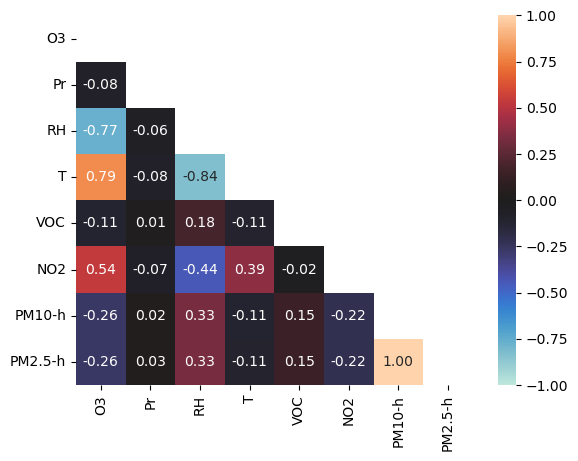

In [30]:
mask = np.zeros_like(corr)
trinangle_indeces = np.triu_indices_from(mask)
mask[trinangle_indeces] = True
sns.heatmap(data=corr,annot=True,fmt=".2f",center=0,vmax=1,vmin=-1,mask=mask)

In [31]:
#sns.pairplot(data=df1.drop(columns=["latitudine","longitudine"]),corner=True)

<AxesSubplot:>

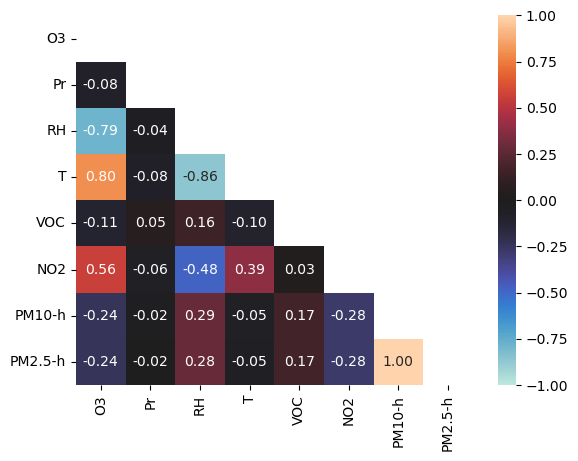

In [32]:
sprearman_corr = df1.corr(method="spearman").drop(columns=["latitudine","longitudine"],index=["latitudine","longitudine"])
mask = np.zeros_like(sprearman_corr)
trinangle_indeces = np.triu_indices_from(mask)
mask[trinangle_indeces] = True
sns.heatmap(data=sprearman_corr,annot=True,fmt=".2f",center=0,vmax=1,vmin=-1,mask=mask)

In [33]:
px.line(data_frame=df1,x="Data",y="NO2",color="Location")